In [28]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName('bts_eda').getOrCreate()

bts_ontime_parquet_path = "/Users/ryan/Data/curated/bts/form_234/ontime_parquet"
df = spark.read.format('parquet').load(bts_ontime_parquet_path)


In [29]:
pdf = df.toPandas()

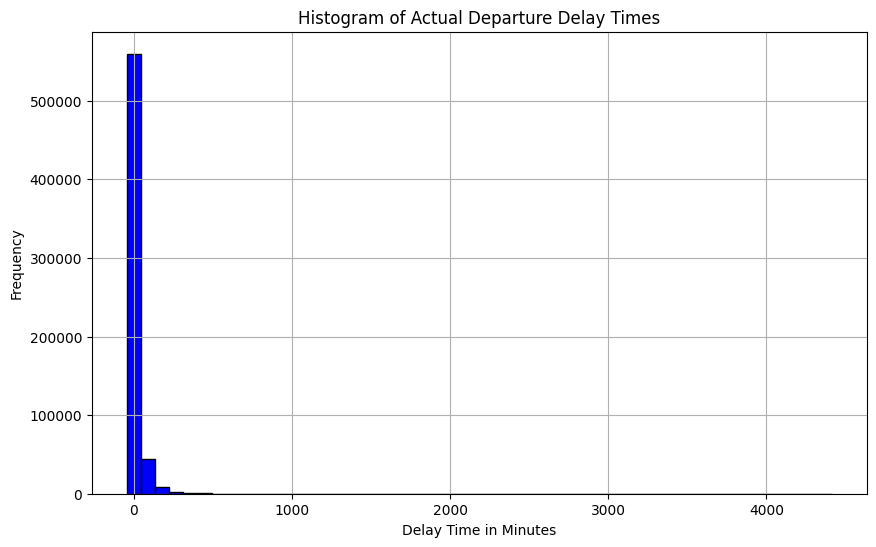

In [30]:
# Histogram for Departure Delays
plt.figure(figsize=(10, 6))
plt.hist(pdf['departure_delay_time_actual_minutes'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Actual Departure Delay Times')
plt.xlabel('Delay Time in Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

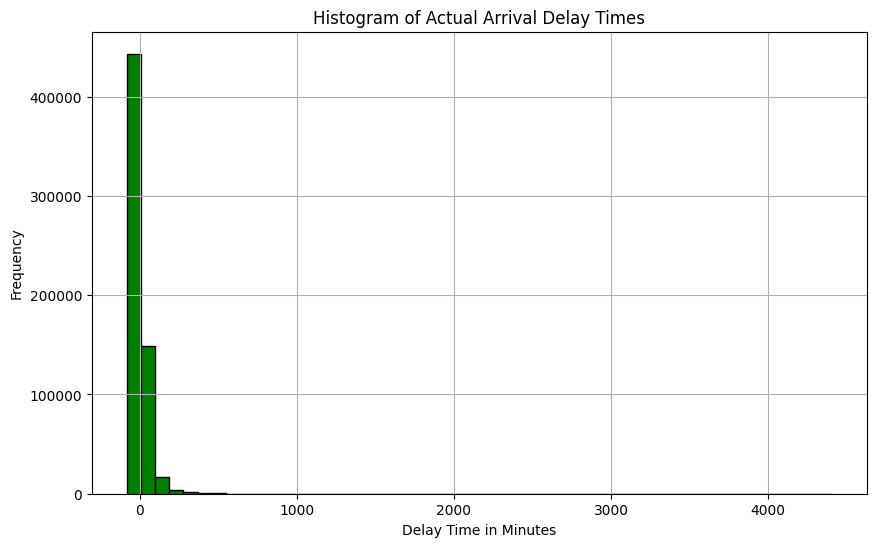

In [31]:
# Histogram for Arrival Delays
plt.figure(figsize=(10, 6))
plt.hist(pdf['arrival_delay_time_actual_minutes'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Actual Arrival Delay Times')
plt.xlabel('Delay Time in Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
pdf = pdf.sort_values('date_of_flight_operation')


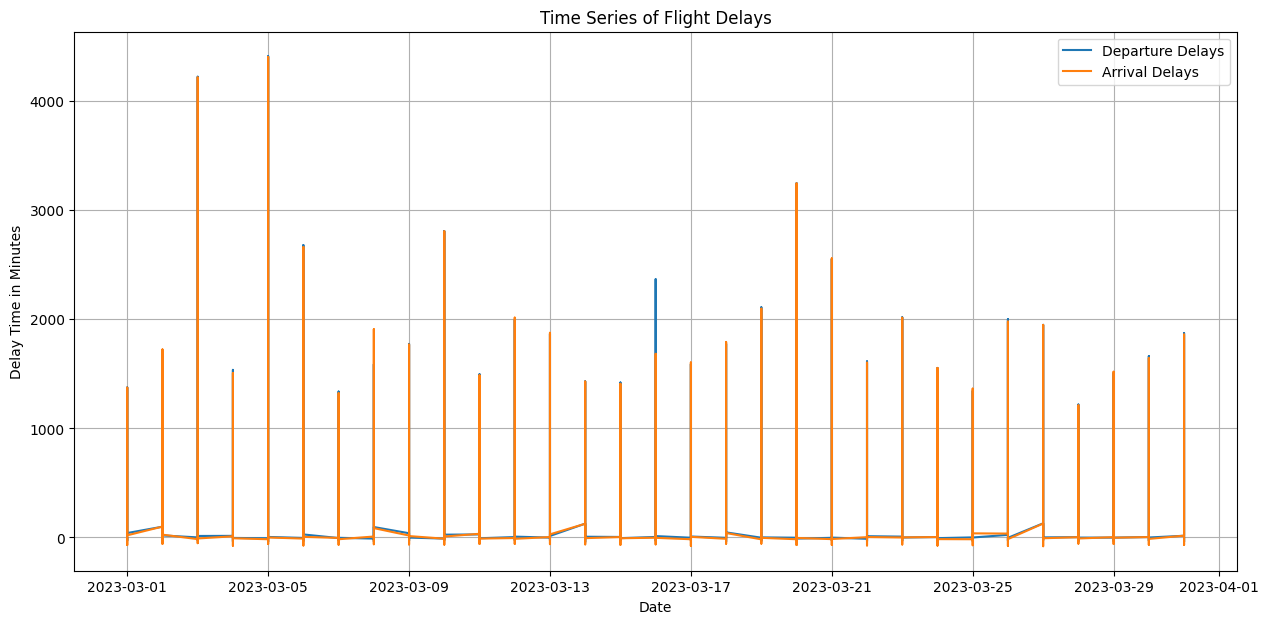

In [33]:
plt.figure(figsize=(15, 7))

# Plotting Departure Delays
plt.plot(pdf['date_of_flight_operation'], pdf['departure_delay_time_actual_minutes'], label='Departure Delays')

# Plotting Arrival Delays
plt.plot(pdf['date_of_flight_operation'], pdf['arrival_delay_time_actual_minutes'], label='Arrival Delays')

plt.title('Time Series of Flight Delays')
plt.xlabel('Date')
plt.ylabel('Delay Time in Minutes')
plt.legend()
plt.grid(True)
plt.show()


For exploratory data analysis (EDA) of the on-time flight performance dataset, it's important to visualize various aspects of the data to uncover patterns, detect outliers, and understand the distribution of the data. Here are some plot suggestions based on the columns you have:

Histograms of Delay Times: Use histograms to visualize the distribution of 'departure_delay_time_actual_minutes' and 'arrival_delay_time_actual_minutes'. This will give you an idea of how often and by how much flights are delayed.

Time Series Plots: Plot 'departure_delay_time_actual_minutes' and 'arrival_delay_time_actual_minutes' over 'date_of_flight_operation' to see how delays vary over time. This can help identify any seasonal patterns or specific periods with unusually high delays.

Box Plots by Day of Week: Create box plots of delays ('departure_delay_time_actual_minutes' and 'arrival_delay_time_actual_minutes') categorized by 'day_of_week_of_flight_operation'. This can reveal if certain days of the week are more prone to delays.

Scatter Plots for Elapsed Time Differences: Scatter plots of 'scheduled_elapsed_time_per_crs' vs. 'actual_gate_to_gate_time' to see if longer flights are more likely to have delays.

Heatmaps for Airport Delays: Using 'departure_airport_code' and 'arrival_airport_code', create heatmaps to show which airports have the most significant delays.

Bar Graphs for Carrier Delays: Aggregate delay minutes by 'marketing_carrier_code' and 'actual_operating_carrier_code' to identify which carriers have the most delays.

Pie Chart for Cancellation Reasons: If the dataset has significant cancellations, a pie chart of 'cancellation_code' can show the proportion of different reasons for cancellations.

Line Plots for Average Monthly Delays: Plotting average delays by 'month_of_flight_operation' can help identify if certain months are more prone to delays.

Correlation Heatmap: To understand how different numeric variables correlate with each other, especially focusing on factors influencing delays.

Count Plot for Number of Landings at Diverted Airports: Use 'number_of_landings_at_diverted_airports' to understand how often flights are diverted.

Each of these plots provides a different perspective on the data, helping to build a comprehensive understanding of the factors affecting flight punctuality.


Creating time series plots in a Jupyter Notebook is a great way to visualize trends and patterns over time in your data. Assuming you have time-related data like flight operation dates and delay times, you can use Python libraries like Pandas and Matplotlib to create these plots. Here's a step-by-step guide:

Import Necessary Libraries:
You'll need Pandas for data handling and Matplotlib for plotting. If you haven't installed these libraries, you can do so using pip (pip install pandas matplotlib).

python
Copy code
import pandas as pd
import matplotlib.pyplot as plt
Load Your Data:
Read your dataset into a Pandas DataFrame. If your data is in a CSV file, you can use pd.read_csv().

python
Copy code
# Replace 'your_data.csv' with the path to your dataset
df = pd.read_csv('your_data.csv')
Convert Dates to DateTime:
Ensure that your date column is in a DateTime format for proper plotting. If it's not, you can convert it using Pandas.

python
Copy code
# Replace 'date_of_flight_operation' with your actual date column name
df['date_of_flight_operation'] = pd.to_datetime(df['date_of_flight_operation'])
Sorting the Data:
It's important to sort the data by the date column to ensure correct plotting.

python
Copy code
df = df.sort_values('date_of_flight_operation')
Plotting Time Series:
You can now plot your time series data. For example, if you want to plot departure and arrival delays over time:

python
Copy code
plt.figure(figsize=(15, 7))

# Plotting Departure Delays
plt.plot(df['date_of_flight_operation'], df['departure_delay_time_actual_minutes'], label='Departure Delays')

# Plotting Arrival Delays
plt.plot(df['date_of_flight_operation'], df['arrival_delay_time_actual_minutes'], label='Arrival Delays')

plt.title('Time Series of Flight Delays')
plt.xlabel('Date')
plt.ylabel('Delay Time in Minutes')
plt.legend()
plt.grid(True)
plt.show()
Customizing the Plot:
You can customize the plot with different colors, styles, and more detailed axis labels if needed.

Handling Large Datasets:
If your dataset is very large, consider resampling the data (e.g., weekly or monthly averages) to make the plot more readable and informative.

Running the Code:
Execute each cell in your Jupyter Notebook to view the plots. Make sure each step is correctly followed for the plots to render properly.

This basic guide should help you get started with creating time series plots in a Jupyter Notebook. You can further explore more advanced features and customizations as per your analysis needs.








